In [39]:
from keras.datasets import imdb
from keras.layers import Dense, Flatten, SimpleRNN, Embedding
from keras.models import Sequential, Model
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [52]:
# 获取imdb数据
max_word = 10000
max_length = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_word)

# 对每条数据进行截断补齐
x_train = pad_sequences(x_train, maxlen = max_length, dtype = "int32", padding = "post", truncating = "post", value = 0)
x_test = pad_sequences(x_test, maxlen = max_length, dtype = "int32", padding = "post", truncating = "post", value = 0)

In [54]:
# 构建模型SimpltRNN
embed_size = 16

model = Sequential()
model.add(Embedding(input_dim = max_word, output_dim = embed_size, input_length = max_length, embeddings_initializer = "glorot_uniform", name = "Embedding_1"))
model.add(SimpleRNN(units = 16, activation = "tanh", return_sequences = False, unroll = False, name = "RNN_1"))
model.add(Dense(units = 16, activation = "relu", name = "Dense_1"))
model.add(Dense(units = 1, activation = "sigmoid", name = "Dense_2"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
RNN_1 (SimpleRNN)            (None, 16)                528       
_________________________________________________________________
Dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
Dense_2 (Dense)              (None, 1)                 17        
Total params: 160,817
Trainable params: 160,817
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 编译模型
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

# 训练模型
earlyStopping = EarlyStopping(monitor = "val_loss", patience = 5)
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.3, callbacks = [earlyStopping])

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 11s 622us/step - loss: 0.6814 - acc: 0.5578 - val_loss: 0.6085 - val_acc: 0.7240
Epoch 2/10
17500/17500 [==============================] - 10s 558us/step - loss: 0.5186 - acc: 0.7728 - val_loss: 0.4995 - val_acc: 0.7775
Epoch 3/10
17500/17500 [==============================] - 10s 550us/step - loss: 0.3659 - acc: 0.8491 - val_loss: 0.4086 - val_acc: 0.8268
Epoch 4/10
17500/17500 [==============================] - 10s 558us/step - loss: 0.2846 - acc: 0.8862 - val_loss: 0.5318 - val_acc: 0.7825
Epoch 5/10
17500/17500 [==============================] - 10s 554us/step - loss: 0.2178 - acc: 0.9153 - val_loss: 0.4849 - val_acc: 0.8232
Epoch 6/10
17500/17500 [==============================] - 10s 549us/step - loss: 0.1573 - acc: 0.9392 - val_loss: 0.5616 - val_acc: 0.7821
Epoch 7/10
17500/17500 [==============================] - 10s 552us/step - loss: 0.1065 - acc: 0.9620 - val_loss: 0.5

In [56]:
# 测试模型
model.evaluate(x_test, y_test, verbose = 1)

25000/25000 [==============================] - 27s 1ms/step


[0.73625842638969419, 0.77756000000000003]

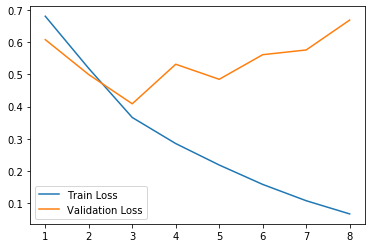

In [58]:
# 绘制结果
plt.figure()
epochs = [i for i in range(1, 9)]
plt.plot(epochs, history.history["loss"], label = "Train Loss")
plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

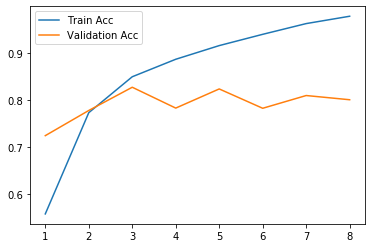

In [59]:
plt.figure()
plt.plot(epochs, history.history["acc"], label = "Train Acc")
plt.plot(epochs, history.history["val_acc"], label = "Validation Acc")
plt.legend()
plt.show()

### 分析：
        修改SimpleRNN层数后，模型立马陷入了过拟合的状态，这种情况下，对模型的超参数进行了修改，都减小了一定程度，这样避免了模型学习能力过强而导致的问题。这两个实验说明了SimpleRNN的确存在着梯度消失/梯度爆炸的问题。